In [1]:
import torch
import torch.nn as nn

In [2]:
# define a list of features and label
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [[3], [7], [11], [15]]

# convert into pytorch tensor
X = torch.tensor(X).float()
y = torch.tensor(y).float()

In [3]:
# store the features in cuda device if GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
y = y.to(device)

In [4]:
# define a model
# mandatory to inherit from nn.module
class MyNeuralNet(nn.Module):
    def __init__(self):
        
        # take advantages of built_in functionnalities of nn.module 
        super().__init__()
        self.input_to_hidden_layer = nn.Parameter(torch.randn(2, 8))
        self.hidden_to_activation = nn.ReLU()
        self.hidden_to_output = nn.Parameter(torch.randn(8, 1))
        
    # forward pass
    def forward(self, X):
        X = X@self.input_to_hidden_layer
        X = self.hidden_to_activation(X)
        X = X@self.hidden_to_output
        return X

In [5]:
torch.manual_seed(0)

# store the model in the GPU
mynet = MyNeuralNet().to(device)

# prediction 
_y = mynet(X)

# loss function
loss_func = nn.MSELoss()
loss_value = loss_func(_y, y)
print(loss_value)

# network parameters
for params in mynet.parameters():
    print(params)

tensor(71.4585, device='cuda:0', grad_fn=<MseLossBackward0>)
Parameter containing:
tensor([[-1.1258, -1.1524, -0.2506, -0.4339,  0.8487,  0.6920, -0.3160, -2.1152],
        [ 0.3223, -1.2633,  0.3500,  0.3081,  0.1198,  1.2377,  1.1168, -0.2473]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[-0.7193],
        [-0.4033],
        [-0.5966],
        [ 0.1820],
        [-0.8567],
        [ 1.1006],
        [-1.0712],
        [ 0.1227]], device='cuda:0', requires_grad=True)


In [6]:
# import the optimization algorithm
from torch.optim import SGD

In [7]:
optimizer = SGD(mynet.parameters(), lr = 0.001)

import time
start = time.time()
# optimization process
loss_history = []
for epoch in range(50):
    # flushed the gradients computed in the previous epoch
    optimizer.zero_grad()
    
    # compute loss
    loss_value = loss_func(mynet(X), y)
    
    # perform backpropagation
    loss_value.backward()
    
    # update the parameters according to the gradients computed
    optimizer.step()
    loss_history.append(loss_value.item())
end = time.time()
print('time : ', end - start)

time :  0.12720727920532227


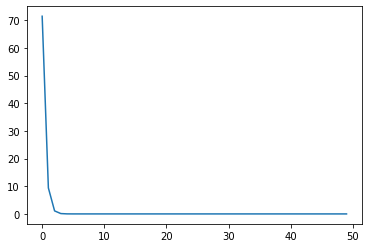

In [8]:
import matplotlib.pyplot as plt
plt.plot(loss_history)